In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
The SVM model
"""
!pip install -r /work/requirements.txt
from getEmbeddings import getEmbeddings
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import os






You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read the data
if not os.path.isfile('./xxtr.npy') or \
    not os.path.isfile('./xxte.npy') or \
    not os.path.isfile('./xytr.npy') or \
    not os.path.isfile('./xyte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/news_articles.csv")
    np.save('./xxtr', xtr)
    np.save('./xxte', xte)
    np.save('./xytr', ytr)
    np.save('./xyte', yte)
xtr,xte,ytr,yte = getEmbeddings("datasets/news_articles.csv")
np.save('./xxtr', xtr)
np.save('./xxte', xte)
np.save('./xytr', ytr)
np.save('./xyte', yte)
xtr = np.load('./xxtr.npy')
xte = np.load('./xxte.npy')
ytr = np.load('./xytr.npy')
yte = np.load('./xyte.npy')



In [ ]:
# Use the built-in SVM for classification
clf = SVC()
clf.fit(xtr, ytr)
y_pred = clf.predict(xte)
m = yte.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (yte[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (yte[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (yte[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (yte[i]==y_pred[i])):
        tp+=1





In [ ]:
precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")   




Accuracy = 85.85%
F1-Score = 92.39%
Recall = 98.60%
Precision = 86.91%
Specificity = 0.00%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


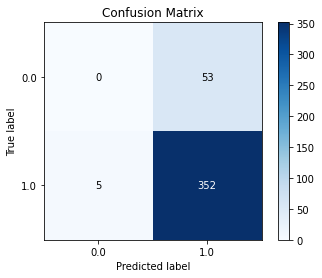

In [ ]:
# Draw the confusion matrix

def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.grid(False)
    plt.show()
plot_cmat(yte, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>